# Juvenile Immigration Case Analysis – Data Exploration
This notebook analyzes a large EOIR history dataset to explore patterns in juvenile immigration cases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv("juvenile_history_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857093 entries, 0 to 2857092
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   idnJuvenileHistory  int64  
 1   idnCase             int64  
 2   idnProceeding       float64
 3   idnJuvenile         float64
dtypes: float64(2), int64(2)
memory usage: 87.2 MB


In [4]:
total_juvenile_rows = df[df["idnJuvenile"] == 1.0].shape[0]
unique_juvenile_cases = df[df["idnJuvenile"] == 1.0]["idnCase"].nunique()
total_cases = df["idnCase"].nunique()
juvenile_ratio = round((unique_juvenile_cases / total_cases) * 100, 2)
print(f"Total juvenile rows: {total_juvenile_rows}")
print(f"Unique juvenile cases: {unique_juvenile_cases}")
print(f"Total cases: {total_cases}")
print(f"Juvenile case ratio: {juvenile_ratio}%")

Total juvenile rows: 233667
Unique juvenile cases: 126236
Total cases: 1917264
Juvenile case ratio: 6.58%


In [5]:
proceedings_per_case = df.groupby("idnCase")["idnProceeding"].nunique()
proceedings_per_case.describe()

count    1.917264e+06
mean     1.461036e+00
std      7.690145e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.600000e+01
Name: idnProceeding, dtype: float64

In [6]:
df.isnull().sum()

idnJuvenileHistory      0
idnCase                 0
idnProceeding          98
idnJuvenile           999
dtype: int64

In [7]:
duplicates = df.duplicated(subset=["idnCase", "idnProceeding"]).sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 55805


In [8]:
juvenile_df = df[df["idnJuvenile"] == 1.0].copy()
os.makedirs("output_data", exist_ok=True)
juvenile_df.to_csv("output_data/juvenile_cases_only.csv", index=False)

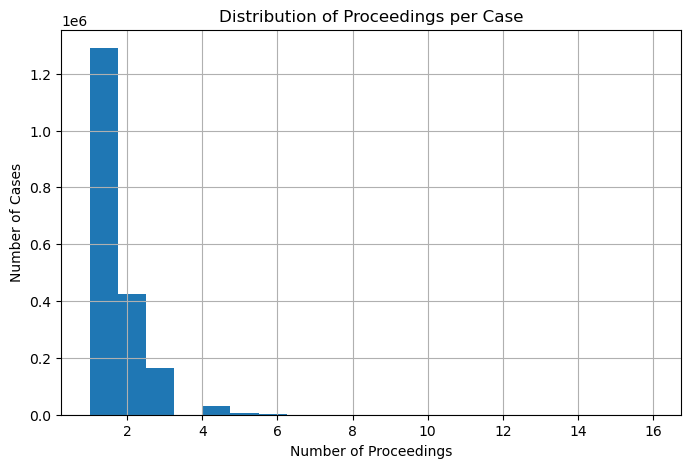

In [9]:
proceedings_per_case.hist(bins=20, figsize=(8, 5))
plt.title("Distribution of Proceedings per Case")
plt.xlabel("Number of Proceedings")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

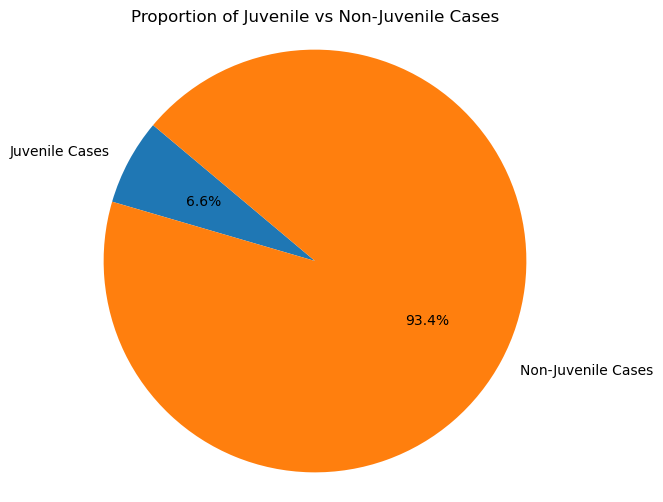

In [10]:
sizes = [unique_juvenile_cases, total_cases - unique_juvenile_cases]
labels = ["Juvenile Cases", "Non-Juvenile Cases"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Proportion of Juvenile vs Non-Juvenile Cases")
plt.show()

### Conclusion
- Juvenile cases make up around 6.6% of total cases.
- Most cases involve 1–2 proceedings, with a few going up to 16.
- There are data quality issues, including duplicates and missing values, that must be considered in downstream analysis.